### The main notebook for modelling the system

Writing a code to integrate the following system. This models the generation of vegetative stripes and the respective diffusion uphill. The variable $u$ denotes the plant biomass, a function of time and space. The variable $w$ denotes the level of surface water. The constant $a$ is the level of rainfall, $w$ the evaporation. 

This is the Klausmeier model: 

$$\frac{\partial u}{\partial t} = wu^2 - bu+ \frac{\partial^2 u }{\partial x^2}$$

$$
\frac{\partial w}{\partial t} = a - w - wu^2 + \nu \frac{\partial w}{\partial x}
$$

Note that by analysis we must have the $a \geq 2b$. The level of rainfall is greater of equal to the rate of plant death multiplied by 2. 

Want to write a function that takes initial conditions, domain size and total time and outputs the vegetation data over time and space. 

In [1]:
import numpy as np 
n = 10

DU = np.zeros((n,n))


#DU[1:-1, 1:-1] = -2 * 1**-2

# Off-diagonal elements
np.fill_diagonal(DU,-2*1**-2)
np.fill_diagonal(DU[1:], 1**-2)
np.fill_diagonal(DU[:, 1:], 1**-2)

# Boundary conditions
'''
DU[0, 0] = -2 * 1**-2
DU[0, 1] = 1**-2
#DU[1, 0] = 1**-2
DU[-1, -2] = 1**-2
DU[-1, -1] = -2 * 1**-2
'''
DU[0,-1] = 1**-2
DU[-1,0] = 1**-2

print(DU)
DU.shape

[[-2.  1.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  1. -2.]]


(10, 10)

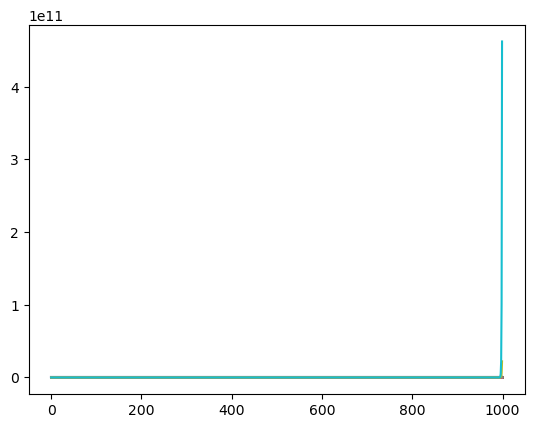

In [5]:
from model_functions import *
from scipy import sparse


param = [2.2,0.45,182.5]
model = model(0.01,0.1,100,100,param)


u = np.ones(model.nx)
w = np.ones(model.nx)
u_next,w_next = model.u_w_next(u,w)

#Plot u on domain 
import matplotlib.pyplot as plt
plt.plot(u_next)
